<a href="https://colab.research.google.com/github/Hanybay/BookRecommendationSystem/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357248 sha256=607e674b9c26a6461df70f5c4e0e9401481fd0bb068087f188c96b1a786e2db8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
import numpy as np
import seaborn as sns
from surprise import NormalPredictor

In [3]:
################################################## Loading the data frames for each csv file ####################################################################

books_df = pd.read_csv("/content/drive/MyDrive/DataSets/Books.csv");
ratings_df = pd.read_csv("/content/drive/MyDrive/DataSets/Ratings.csv");
users_df = pd.read_csv("/content/drive/MyDrive/DataSets/Users.csv");

<ipython-input-3-32ce7da292ad>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("/content/drive/MyDrive/DataSets/Books.csv");


In [ ]:
#print(books_df.describe())
#print(ratings_df.describe())
#print(users_df.describe())

books_df.info()
print("\n\n***********************************************************************************")
ratings_df.info()
print("\n\n***********************************************************************************")
users_df.info()
print("\n\n***********************************************************************************")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


***********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149

In [4]:
################################################## STEP 1 : CHECKING MISSING VALUES ####################################################################
print("\n\n********************************* BOOKS DATASET ******************************************")
print(books_df.isnull().sum())
print("\n\n********************************* RATINGS DATASET **************************************************")
print(ratings_df.isnull().sum())
print("\n\n********************************* USERS DATASET ******************************************")
print(users_df.isnull().sum())



def missing_values_table(data):
  """
  Creates a DataFrame showing missing values, total entries, and percentages per column.

  Args:
      data (pd.DataFrame): The DataFrame containing the data.

  Returns:
      pd.DataFrame: A DataFrame with columns 'Column Name', 'Missing Values', 'Total Entries', and '% Missing'.
  """
  missing_values = data.isnull().sum()
  total_entries = data.shape[0]
  percent_missing = (missing_values / total_entries) * 100
  missing_values_df = pd.DataFrame({
      'Missing Values': missing_values,
      'Total Entries': total_entries,
      '% Missing': percent_missing.round(10)  # Rounding percentages to ten decimals (in case the percentages are too small)
  })
  return missing_values_df



********************************* BOOKS DATASET ******************************************
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


********************************* RATINGS DATASET **************************************************
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


********************************* USERS DATASET ******************************************
User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
books_df.head(40)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [5]:
# --------------------- In the books dataframe, the year of publication is an object ------------- #
# --------------------- Transforming the year of publication from object --> integer

# Filling the NaN values to see how many rows are wrongly formatted (if we don't fill them, we won't be able to execute the next instruction because we have na values)
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].fillna('')

# Identifying rows with non-numeric 'Year-Of-Publication'
books_df_incorrect_rows = books_df[books_df['Year-Of-Publication'].str.contains('[a-zA-Z]', na=False)]

In [ ]:
# Printing the incorrect rows in a form of dataset for clarity
books_df_incorrect_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [6]:
# After printing our incorrecrt rows dataframe, we observe that there are 3 shifted columns for the Book author
# Since there are only three rows, we'll use coerce option to put NaN and get rid of these rows
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors="coerce")

In [7]:
books_df = books_df.dropna()

# Transforming the year of publication from object to int after dropping Na values
books_df.loc[:, 'Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Printing our missing values in a form of df (for presentation puposes)
# We can observe that our data has been cleaned from any rows that contained missing values
books_missing_values = missing_values_table(books_df)
books_missing_values

,Missing Values,Total Entries,% Missing
ISBN,0,271353,0.0
Book-Title,0,271353,0.0
Book-Author,0,271353,0.0
Year-Of-Publication,0,271353,0.0
Publisher,0,271353,0.0
Image-URL-S,0,271353,0.0
Image-URL-M,0,271353,0.0
Image-URL-L,0,271353,0.0


In [ ]:
# Ratings dataframe has 1,149,780 entries.
ratings_missing_values = missing_values_table(ratings_df)
ratings_missing_values

,Missing Values,Total Entries,% Missing
User-ID,0,1149780,0.0
ISBN,0,1149780,0.0
Book-Rating,0,1149780,0.0


In [ ]:
users_missing_values = missing_values_table(users_df)
users_missing_values

,Missing Values,Total Entries,% Missing
User-ID,0,278858,0.000000
Location,0,278858,0.000000
Age,110762,278858,39.719857


In [ ]:
#-------------------------------- Checking duplicated rows in each dataset --------------------------------#

print(f"IN THE BOOKS DF, THERE ARE {books_df.duplicated().sum()} DUPLICATED ROWS")
print(f"IN THE USERS DF, THERE ARE {users_df.duplicated().sum()} DUPLICATED ROWS")
print(f"IN THE RATINGS DF, THERE ARE {ratings_df.duplicated().sum()} DUPLICATED ROWS")

IN THE BOOKS DF, THERE ARE 0 DUPLICATED ROWS
IN THE USERS DF, THERE ARE 0 DUPLICATED ROWS
IN THE RATINGS DF, THERE ARE 0 DUPLICATED ROWS


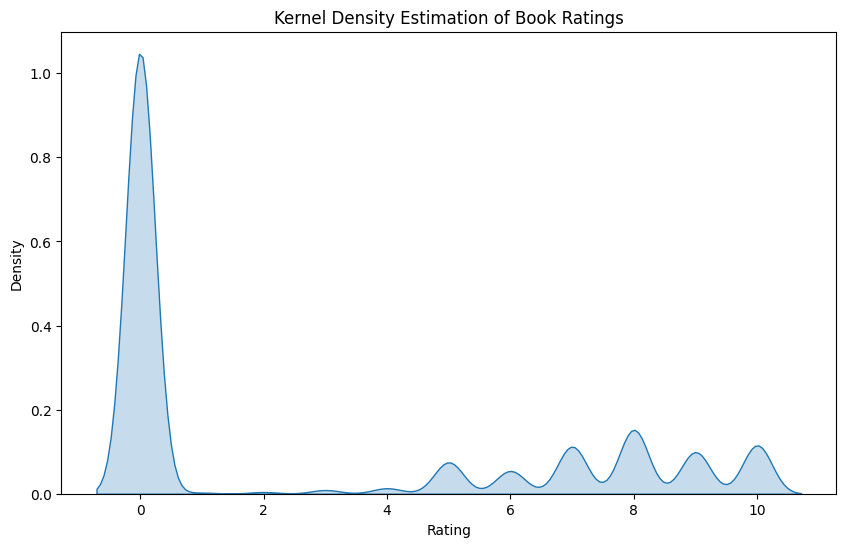

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(ratings_df['Book-Rating'], fill=True)
plt.title('Kernel Density Estimation of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(False)
plt.show()

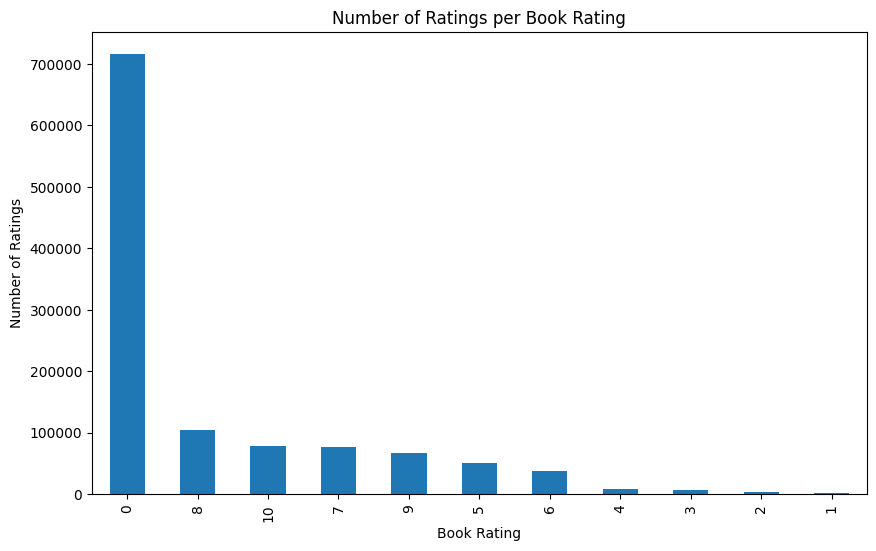

In [ ]:
# ------------------------- Plotting the frequency of each rating in the dataset -------------------------------------- #
# ------------------------- Ratings can go from 1-10, when 0 is observed, it means that the rating is implicit -------------- #
plt.figure(figsize=(10, 6))
ratings_df['Book-Rating'].value_counts().plot(kind='bar')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Book Rating')
plt.show()

<Figure size 1500x1500 with 0 Axes>

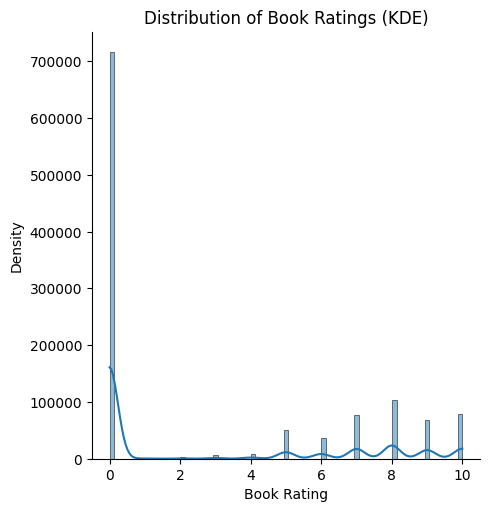

In [ ]:
# --------------- Plotting user ratings to check and confirm whether it follows a normal distribuition or not
plt.figure(figsize=(15, 15))
sns.displot(ratings_df['Book-Rating'], kde=True)
plt.xlabel('Book Rating')
plt.ylabel('Density')
plt.title('Distribution of Book Ratings (KDE)')
plt.show()

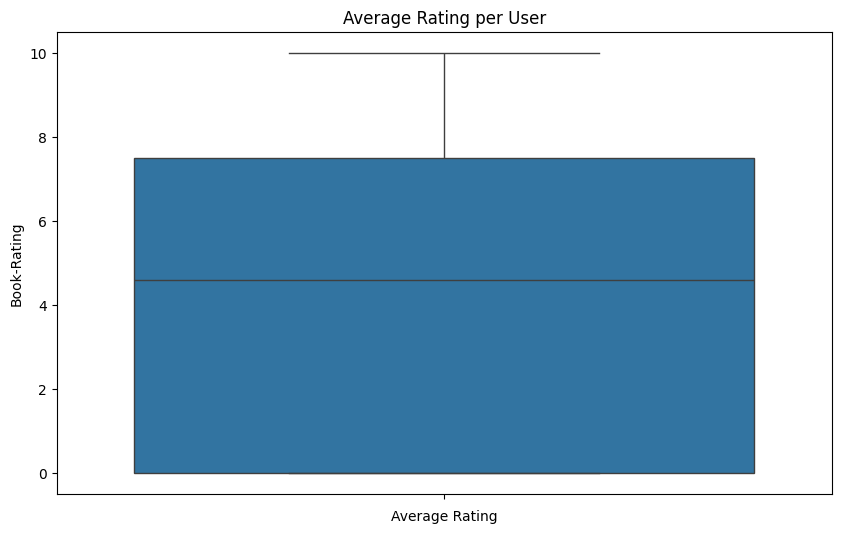

In [8]:
# Plotting average rating by users
avg_rating_per_user = ratings_df.groupby('User-ID')['Book-Rating'].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(avg_rating_per_user)
plt.xlabel('Average Rating')
plt.title('Average Rating per User')
plt.show()

In [9]:
# Computing the number of ratings done by each UNIQUE user.
num_ratings_per_user = ratings_df['User-ID'].value_counts()

105283
278858
Total number of users: 105283
105283


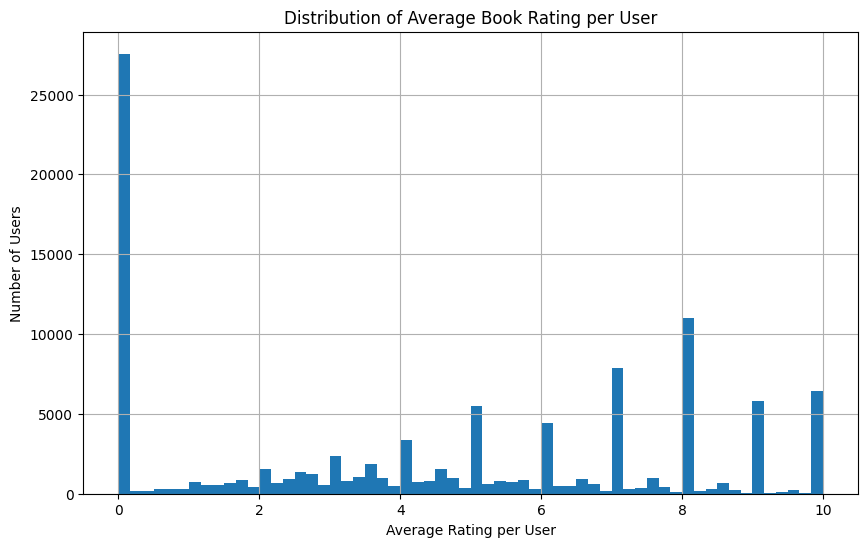

In [10]:
print(ratings_df['User-ID'].nunique())
print(users_df['User-ID'].nunique())

hist, bin_edges = np.histogram(avg_rating_per_user, bins=60)

# Suming the counts of all bins
total_users = hist.sum()

print(f"Total number of users: {total_users}")

# Plotting the distribution of average book rating per user
# From the 105 000 users who have rated, about 30 000 users have implcitly (0) rated
# And so on and so forth
print(len(avg_rating_per_user))
plt.figure(figsize=(10, 6))
avg_rating_per_user.hist(bins=60)
plt.xlabel('Average Rating per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Average Book Rating per User')
plt.show()


In [11]:
# Getting all the unique users from the Users data frame
users_from_users_df = set(users_df['User-ID'].unique())

# Getting all the unique users from the ratings data frame to see who has rated and who has not
users_from_ratings_df = set(ratings_df['User-ID'].unique())

# Finding users who have provided ratings
users_who_have_rated = users_from_users_df.intersection(users_from_ratings_df)

# Finding users who have not provided ratings
users_who_have_not_rated = users_from_users_df.difference(users_from_ratings_df)

print(f'Number of users in users_df: {len(users_from_users_df)}')
print(f'Number of users in ratings_df: {len(users_from_ratings_df)}')
print(f'Number of users who have provided ratings: {len(users_who_have_rated)}')
print(f'Number of users who have not provided ratings: {len(users_who_have_not_rated)}')

Number of users in users_df: 278858
Number of users in ratings_df: 105283
Number of users who have provided ratings: 105283
Number of users who have not provided ratings: 173575


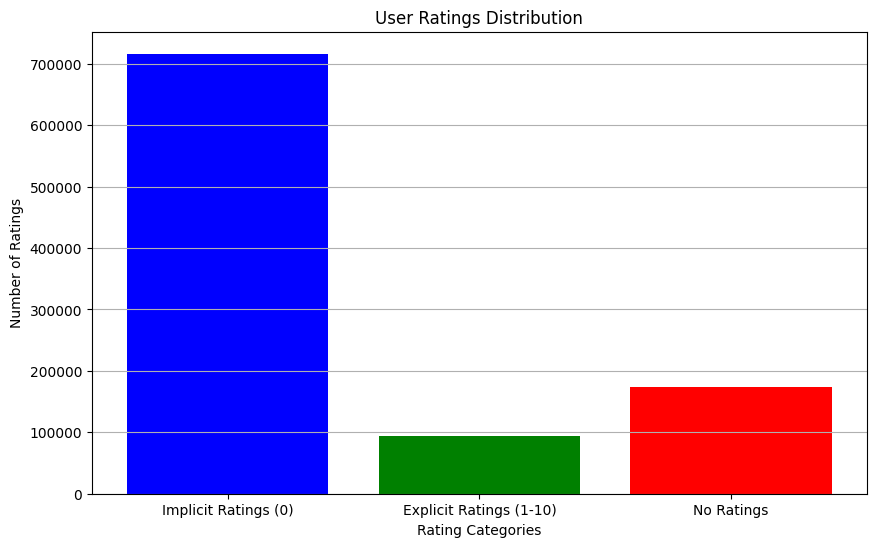

In [12]:
users_rated = users_df[users_df['User-ID'].isin(users_from_ratings_df)]
users_not_rated = users_df[~users_df['User-ID'].isin(users_from_ratings_df)]

users_rated_ids = users_rated['User-ID'].values
ratings_count = num_ratings_per_user.loc[users_rated_ids].values

implicit_ratings_count = (ratings_df['Book-Rating'] == 0).sum()

# Preparing data for users who haven't rated (not present in num_ratings_per_user)
users_not_rated_ids = users_not_rated['User-ID'].values
no_ratings_count = len(users_not_rated)

# Counting the number of users with no ratings
no_ratings_count = len(users_not_rated)

# Counting the number of users with explicit ratings (1-10)
explicit_ratings_count = np.sum((ratings_count > 0) & (ratings_count <= 10))

# Preparing data for plotting
categories = ['Implicit Ratings (0)', 'Explicit Ratings (1-10)', 'No Ratings']
counts = [implicit_ratings_count, explicit_ratings_count, no_ratings_count]

# Column chart plot to check user ratings distribution
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red'])

plt.xlabel('Rating Categories')
plt.ylabel('Number of Ratings')
plt.title('User Ratings Distribution')
plt.grid(axis='y')
plt.show()

In [13]:
# I've noticed that in the ratings data set, there are some books that are not available in the books_df data frame
# Furthermore, some ISBNS are not valid, we'll proceed to deleting these rows

ratings_isbn_set = set(ratings_df['ISBN'].tolist())
books_isbn_set = set(books_df['ISBN'].tolist())

# Find the difference between the sets (ISBNs in ratings_df but not in books_df)
missing_isbn_set = ratings_isbn_set.difference(books_isbn_set)



In [14]:
# Printing the number of rows that are non existant in the books data frame

print(len(missing_isbn_set))

70412


In [ ]:

# Printing the missing ISBNs (if any)
# print("Missing ISBNs:")
# for isbn in missing_isbn_set:
#   print(isbn)

In [16]:
# Some of the ISBN's are not valid, and since only 70 000 ISBNS are non existant
# we'll proceed to the deletion of these rows from the ratings_df in the following way :

ratings_df = ratings_df[~ratings_df['ISBN'].isin(missing_isbn_set)]

In [26]:
knn_sampled_df = ratings_df.sample(frac=0.2, random_state=42)
#first_5000_rows = ratings_df.iloc[:10000]
# n_unique_users = first_5000_rows['User-ID'].nunique()
# n_unique_books = first_5000_rows['ISBN'].nunique()

n_unique_users = knn_sampled_df['User-ID'].nunique()
n_unique_books = knn_sampled_df['ISBN'].nunique()

# Print results
print("Number of unique users before pivot:", n_unique_users)
print("Number of unique books before pivot:", n_unique_books)



Number of unique users before pivot: 37317
Number of unique books before pivot: 99696


In [18]:
# Re-computing the avg_rating_per_user but only for the sampled_df,
# in order to not have all the users when the normalization is happening using the avg_rating_per_user that was computed for the entire dataset
sampled_df_avg_rating_per_user = knn_sampled_df.groupby('User-ID')['Book-Rating'].mean()


In [22]:
# Creating the pivot matrix of the 5000 chosen rows

#user_ratings_matrix = first_5000_rows.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

#user_ratings_matrix = knn_sampled_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

<ipython-input-22-3102314b2c62>:5: PerformanceWarning: The following operation may generate 3720355632 cells in the resulting pandas object.
  user_ratings_matrix = sampled_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')


In [24]:
#print(user_ratings_matrix.shape)

(37317, 99696)


In [28]:
# In our KNN sampled data, we'll be removing all the users who have less than 10 ratings
threshold = 10

# 1. Counting the number of ratings per user
user_counts = knn_sampled_df['User-ID'].value_counts()

# 2. Filtering users who have at least `threshold` ratings
users_to_keep = user_counts[user_counts >= threshold].index

# 3. Filtering the DataFrame
filtered_knn_sampled_df = knn_sampled_df[knn_sampled_df['User-ID'].isin(users_to_keep)]

# Checking the size of the filtered DataFrame
print(f"Original data size: {knn_sampled_df.shape}")
print(f"Filtered data size: {filtered_knn_sampled_df.shape}")


Original data size: (206226, 3)
Filtered data size: (141102, 3)


In [31]:
# Replacing all the implicit ratings equal to 0 to 0.1, because surprise doesn't handle implicit ratings

filtered_knn_sampled_df.loc[filtered_knn_sampled_df['Book-Rating'] == 0, 'Book-Rating'] = 0.1

In [33]:
filtered_knn_sampled_df

,User-ID,ISBN,Book-Rating
929643,225810,055358085X,0.1
516821,125203,0380000458,0.1
81777,16943,0451186079,0.1
1127842,270713,0425163407,0.1
1044363,249894,0803718977,7.0
...,...,...,...
595439,143415,080703102X,0.1
1063648,254241,0345396553,0.1
329491,78783,0345438329,0.1
490666,116931,1853260177,0.1


In [ ]:
# Counting unique users and books to understand why the shape of the user_ratings_matrix changes after doing a pivot
n_unique_users = user_ratings_matrix.shape[0]
n_unique_books = user_ratings_matrix.shape[1]

# Printing results
print("Number of unique users:", n_unique_users)
print("Number of unique books:", n_unique_books)

Number of unique users: 37317
Number of unique books: 99696


In [ ]:
# Now we understand that the number of rows in the matrix corresponds to the number of UNIQUE ROWS in the user_ratings_matrix
# And the number of columns is the number of UNIQUE books from the 5000 selected rows
#

In [ ]:
# user_id = 9
# user_9_ratings = ratings_df.loc[ratings_df['User-ID'] == 9]
# isbn = '0440234743'

# user_book_rating = ratings_df.loc[(ratings_df['User-ID'] == user_id) & (ratings_df['ISBN'] == isbn), 'Book-Rating']

# if not user_book_rating.empty:
#     print(f"The rating of user {user_id} for the book with ISBN {isbn} is {user_book_rating.iloc[0]}")
# else:
#     print(f"No rating found for user {user_id} for the book with ISBN {isbn}")
# user_9_ratings

user_ratings_matrix

ISBN,0001047868,0001232088,0001374869,000171421X,0001714600,0001846086,0001848445,0001900277,0001939203,0001952404,...,B00011SOXI,B00013AWVI,B00016560C,B00017IWGQ,B0001FZGBC,B0001FZGPI,B0001FZGRQ,B0001PIOX4,B00029DGGO,B0002K6K8O
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_ratings_matrix_centered = user_ratings_matrix.sub(sampled_df_avg_rating_per_user, axis=0)
# Filling the 0 ratings with 0.1 values for Surprise to work (it needs explicit values)
user_ratings_matrix_normed = user_ratings_matrix_centered.fillna(0.1)

In [ ]:
user_ratings_long = user_ratings_matrix_normed.reset_index().melt(id_vars=['User-ID'], var_name='ISBN', value_name='Book-Rating')
user_ratings_long.rename(columns={'index': 'user_id'}, inplace=True)

In [ ]:
print(user_ratings_long.shape)

(3720355632, 3)


In [ ]:
n_unique_users = user_ratings_matrix_normed.shape[0]
n_unique_books = user_ratings_matrix_normed.shape[1]
unique_books = ratings_df['ISBN'].nunique()
unique_books_df = books_df['ISBN'].nunique()
# Printing results
print("Number of unique users:", n_unique_users)
print("Number of unique books:", n_unique_books)
print("Number of unique books in books dataset:", unique_books_df)
print("Number of unique books in ratings dataset:", unique_books)

Number of unique users: 37317
Number of unique books: 99696
Number of unique books in books dataset: 271353
Number of unique books in ratings dataset: 270144


In [ ]:
# ratings_isbn_set = set(ratings_df['ISBN'].tolist())
# books_isbn_set = set(books_df['ISBN'].tolist())

# # Finding the difference between the sets (ISBNs in ratings_df but not in books_df)
# missing_isbn_set = ratings_isbn_set.difference(books_isbn_set)
# print(len(missing_isbn_set))

In [ ]:
# ----------- Model 1 : Normal predictor ----------------------------- #


reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(ratings_df[['User-ID', 'ISBN', 'Book-Rating']], reader=reader)

# Defining the first model
mdoel1 = NormalPredictor()

trainset = data.build_full_trainset()
mdoel1.fit(trainset)


user_id = 1
item_id = 1567407781

prediction = mdoel1.predict(uid=user_id, iid=item_id)

# Accessing the predicted ratings
predicted_rating = prediction.est
predicted_rating = int(round(predicted_rating))
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating}")

filtered_ratings_df = ratings_df[ratings_df['Book-Rating'] == predicted_rating]
isbns_with_desired_rating = filtered_ratings_df['ISBN'].unique()

# Filter books dataset based on the ISBNs with the desired rating
books_with_desired_rating = books_df[books_df['ISBN'].isin(isbns_with_desired_rating)][['Book-Title']]

# Display the filtered books
print(books_with_desired_rating.head(10))

Predicted rating for user 1 and item 1567407781: 1
                                            Book-Title
19                Beloved (Plume Contemporary Fiction)
26                                         Wild Animus
47                                        Isle of Dogs
51   Left Behind: A Novel of the Earth's Last Days ...
72                               The Accidental Virgin
90                              The Catcher in the Rye
91   El Senor De Los Anillos: LA Comunidad Del Anil...
101  Rich Dad, Poor Dad: What the Rich Teach Their ...
104  Creating Wealth : Retire in Ten Years Using Al...
145       Whisper of Evil (Hooper, Kay. Evil Trilogy.)


In [ ]:
# ----------- Primitve Model 2  : KNN with fictive data ----------------------------- #

# KNN algorithm with fictive data for testing purposes

import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Sample data: user-item matrix
data = {'Book1': [5, 4, 3, 0],
        'Book2': [4, 0, 0, 2],
        'Book3': [3, 2, 4, 5],
        'Book4': [0, 2, 4, 4]}

df = pd.DataFrame(data, index=['User1', 'User2', 'User3', 'User4'])

# User-based recommendation
# Transposing the matrix to have users as rows and books as columns
user_book_matrix = df.values

# Fitting k-NN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_book_matrix)

# Finding k-nearest neighbors for the first user
user_index = 2
distances, indices = knn.kneighbors(user_book_matrix[user_index].reshape(1, -1), n_neighbors=3)

# Getting book recommendations based on similar users, excluding the user itself
similar_users = indices.flatten()[1:]
recommendations = df.iloc[similar_users].mean(axis=0).sort_values(ascending=False)

# Recommend books the user has not rated yet
user_rated_books = df.iloc[user_index]
recommended_books = recommendations[user_rated_books == 0]
print("Recommended books for User1:")
print(recommended_books)

Recommended books for User1:
Book2    1.0
dtype: float64


In [ ]:
filtered_df = sampled_df[sampled_df['Book-Rating'] > 0]

In [ ]:
user_ratings_sum = sampled_df.groupby('User-ID')['Book-Rating'].sum()
valid_users = user_ratings_sum[user_ratings_sum > 0].index
filtered_df = sampled_df[sampled_df['User-ID'].isin(valid_users)]

# Filtering out items with all zero ratings
item_ratings_sum = filtered_df.groupby('ISBN')['Book-Rating'].sum()
valid_items = item_ratings_sum[item_ratings_sum > 0].index
filtered_df = filtered_df[filtered_df['ISBN'].isin(valid_items)]

In [ ]:
filtered_df

,User-ID,ISBN,Book-Rating
1127842,270713,0425163407,0
1044363,249894,0803718977,7
1144790,275281,0441001106,0
1101388,264321,074724250X,7
517598,125411,0684833778,8
...,...,...,...
8745,278418,1575842955,0
607712,146855,0140366784,9
893065,215947,2070373622,0
329491,78783,0345438329,0


In [ ]:
user_ratings_sum_after = filtered_df.groupby('User-ID')['Book-Rating'].sum()
item_ratings_sum_after = filtered_df.groupby('ISBN')['Book-Rating'].sum()


print("Users with all zero ratings after filtering:", (user_ratings_sum_after == 0).sum())
print("Items with all zero ratings after filtering:", (item_ratings_sum_after == 0).sum())

Users with all zero ratings after filtering: 0
Items with all zero ratings after filtering: 0


In [ ]:
filtered_df = filtered_df[filtered_df['User-ID'].isin(user_ratings_sum_after[user_ratings_sum_after > 0].index)]
filtered_df = filtered_df[filtered_df['ISBN'].isin(item_ratings_sum_after[item_ratings_sum_after > 0].index)]

In [ ]:
filtered_df = ratings_df[ratings_df['Book-Rating'] != 0]
print(filtered_df.describe())

             User-ID    Book-Rating
count  383837.000000  383837.000000
mean   136031.704184       7.626688
std     80482.534248       1.841344
min         8.000000       1.000000
25%     67591.000000       7.000000
50%    133790.000000       8.000000
75%    206219.000000       9.000000
max    278854.000000      10.000000


In [ ]:
# ----------- Primitve Model 2  : KNN with real data ----------------------------- #


data = user_ratings_matrix_normed[['User-ID', 'ISBN', 'rating']]
reader = Reader(rating_scale=(1, 10))
dataset = Dataset.load_from_df(data, reader)

# Splitting our data into training sets and test sets
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Defining our model's options
sim_options = {
    'name': 'cosine',
    'user_based': True  # True for user-user, False for item-item similarity
}

# Defining the first model
model3 = KNNBasic(sim_options=sim_options)

trainset = dataset.build_full_trainset()

# Training the KNN-User model
model3.fit(trainset)

# Making predictions using the test set we split earlier
predictions = model3.test(testset)

# Evaluating the model
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))

cv_results = cross_validate(model3, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Display cross-validation results
print(cv_results)

print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))
# Example: Predicting rating for a specific user and item
# user_id = '276725'
# isbn = '034545104X'
# pred = knn.predict(user_id, isbn)
# print(pred)

KeyError: "None of [Index(['User-ID', 'ISBN', 'rating'], dtype='object', name='ISBN')] are in the [columns]"